In [1]:
import dataset
import torch
import torchvision
from PIL import Image,ImageOps
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2

ann_path_1 = '/opt/ml/upstage_OCR/Data set/annotations/general 82_114.json'
ann_path_2 = '/opt/ml/upstage_OCR/Data set/annotations/general 115_147.json'
ocr_url = "http://118.222.179.32:30000/ocr/"
image_root_1 = '/opt/ml/upstage_OCR/Data set/real data/general'
image_root_2 = '/opt/ml/upstage_OCR/Data set/real data/general'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

transform = A.Compose([
    A.Resize(512,512),
    ToTensorV2()
    ], additional_targets={'mask2': 'mask', 'mask3': 'mask'})
dataset1 = dataset.WifiDataset_segmentation(ann_path_1, ocr_url, image_root_1, transform=transform,mode='test')
dataset2 = dataset.WifiDataset_segmentation(ann_path_2, ocr_url, image_root_2, transform=transform,mode='test')

  0%|          | 0/33 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
load images ...


  0%|          | 0/33 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
load images ...


100%|██████████| 33/33 [00:42<00:00,  1.29s/it]


In [2]:
cat_dataset = dataset.Concat_Dataset([dataset1,dataset2])

In [3]:
dataset1.ocr_lists[0][1]['ocr']['word']

[{'points': [[109, 274], [160, 274], [159, 289], [109, 289]],
  'orientation': 'Horizontal',
  'text': '의정부'},
 {'points': [[170, 274], [220, 274], [220, 289], [170, 289]],
  'orientation': 'Horizontal',
  'text': '서비스'},
 {'points': [[230, 275], [261, 275], [261, 289], [230, 289]],
  'orientation': 'Horizontal',
  'text': '센터'},
 {'points': [[319, 275], [350, 275], [350, 290], [319, 290]],
  'orientation': 'Horizontal',
  'text': '안내'},
 {'points': [[273, 276], [310, 276], [310, 289], [273, 289]],
  'orientation': 'Horizontal',
  'text': 'WIFI'},
 {'points': [[104, 328], [118, 328], [118, 338], [104, 338]],
  'orientation': 'Horizontal',
  'text': 'ID'},
 {'points': [[130, 328], [160, 328], [160, 338], [130, 338]],
  'orientation': 'Horizontal',
  'text': 'BMW'},
 {'points': [[165, 328], [181, 328], [181, 338], [165, 338]],
  'orientation': 'Horizontal',
  'text': 'AS'},
 {'points': [[247, 328], [266, 328], [266, 338], [247, 338]],
  'orientation': 'Horizontal',
  'text': 'PW'},
 {'po

In [4]:
idx = 3
x,y,info,mask_list = cat_dataset[idx]
image_name =info['file_name']
image = Image.open(os.path.join(image_root_1,image_name))
image = ImageOps.exif_transpose(image)
image = torchvision.transforms.ToTensor()(image)

In [7]:
mask_list[0]

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 ('wifi', [[257, 164], [345, 167], [344, 195], [256, 192]]))

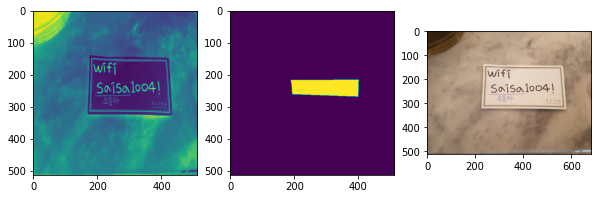

In [6]:
import matplotlib.pyplot as plt
import torchvision
t = torchvision.transforms.Compose(
    [torchvision.transforms.ToPILImage()]
)

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(t(x[0]))

plt.subplot(1,3,2)
plt.imshow(t(y.type(torch.FloatTensor)*0.5))

plt.subplot(1,3,3)
plt.imshow(t(image))

plt.show()